In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import joblib

In [203]:
data=pd.read_csv("/content/drive/MyDrive/loan_default_prediction_project.csv")
data

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Female,98081.105862,Unemployed,Urban,727,0.961613,3586.586891,Non-Default,41473.241896,3.700707,23
996,40,Male,30044.017181,Employed,Rural,416,0.775082,32993.493341,Default,48942.588814,12.932559,62
997,27,Female,21355.813191,Unemployed,Rural,806,0.621937,21579.216456,Default,34010.252873,3.825633,55
998,61,Female,81612.656941,NaN,Rural,845,0.606793,38180.153354,Default,17504.010506,13.263354,27


In [204]:
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [205]:
data.tail()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
995,22,Female,98081.105862,Unemployed,Urban,727,0.961613,3586.586891,Non-Default,41473.241896,3.700707,23
996,40,Male,30044.017181,Employed,Rural,416,0.775082,32993.493341,Default,48942.588814,12.932559,62
997,27,Female,21355.813191,Unemployed,Rural,806,0.621937,21579.216456,Default,34010.252873,3.825633,55
998,61,Female,81612.656941,NaN,Rural,845,0.606793,38180.153354,Default,17504.010506,13.263354,27
999,19,Male,84572.442989,Unemployed,Suburban,624,0.849470,49629.885929,Non-Default,49850.267385,16.606985,49


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,208
Income,0
Employment_Status,94
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [ ]:
data.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,60705.291386,571.094000,0.485502,25239.656186,27636.369345,11.538267,42.221000
std,13.497852,24594.030383,163.395983,0.296466,14202.689890,12925.200961,4.883342,17.116867
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40820.367273,429.000000,0.220606,13597.494593,16756.405848,7.483547,27.000000
50%,42.000000,60547.119929,567.000000,0.483633,25439.429898,27938.066858,11.537942,42.000000
75%,52.000000,80338.552791,720.250000,0.735476,37305.466739,39151.564233,15.499129,57.000000
max,64.000000,150000.000000,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


In [206]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Employment_Status']=data['Employment_Status'].fillna(data['Employment_Status'].mode()[0])

In [207]:
data.isnull().sum()

,0
Age,0
Gender,0
Income,0
Employment_Status,0
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [ ]:
data.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,60705.291386,571.094000,0.485502,25239.656186,27636.369345,11.538267,42.221000
std,13.497852,24594.030383,163.395983,0.296466,14202.689890,12925.200961,4.883342,17.116867
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40820.367273,429.000000,0.220606,13597.494593,16756.405848,7.483547,27.000000
50%,42.000000,60547.119929,567.000000,0.483633,25439.429898,27938.066858,11.537942,42.000000
75%,52.000000,80338.552791,720.250000,0.735476,37305.466739,39151.564233,15.499129,57.000000
max,64.000000,150000.000000,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


<ipython-input-154-d272914c07ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Loan_Status', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


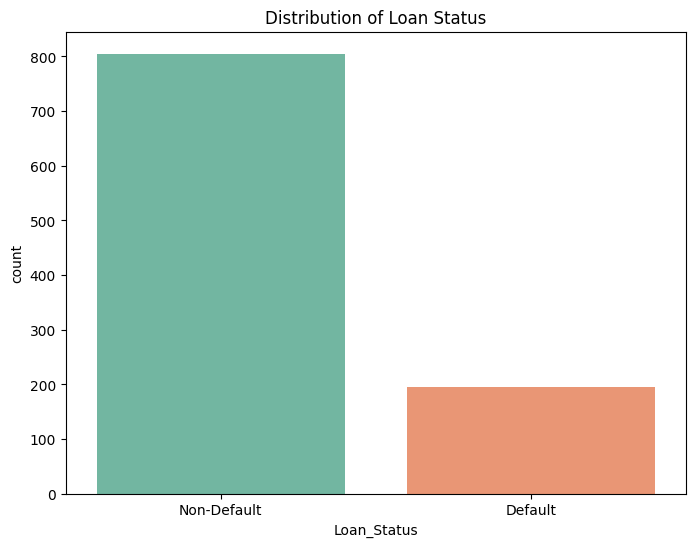

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

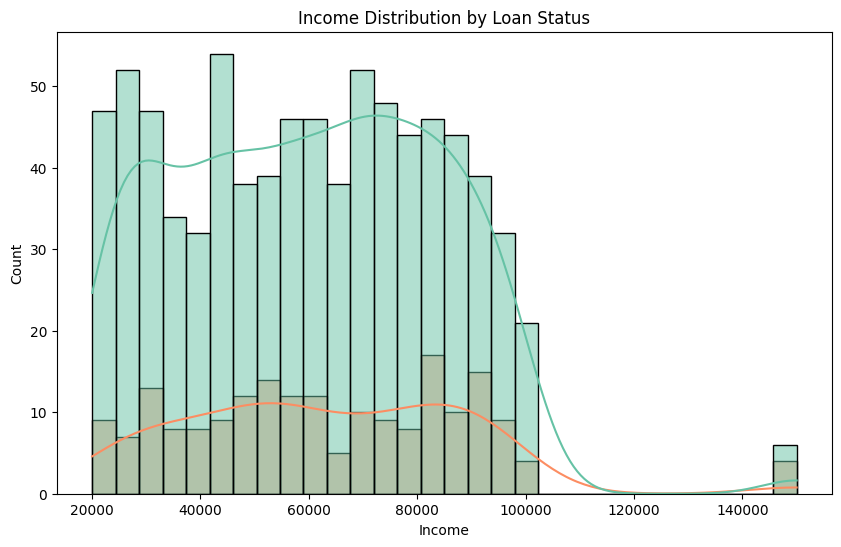

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

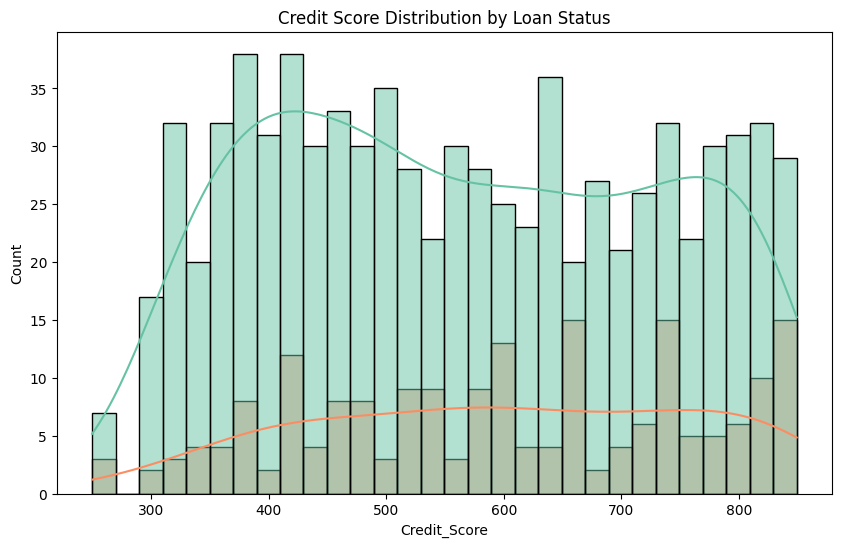

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


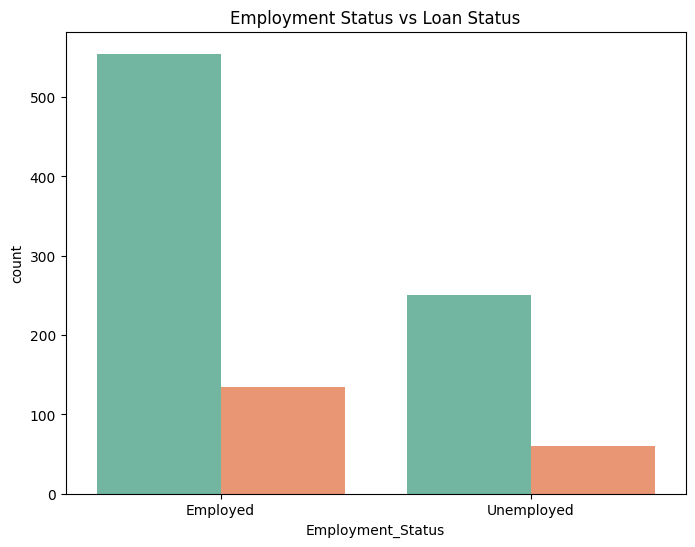

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

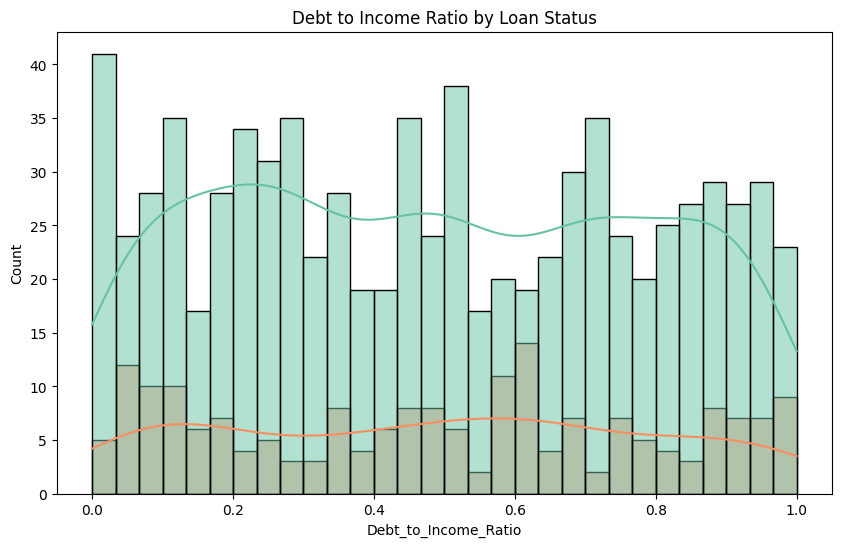

<ipython-input-154-d272914c07ef>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Loan_Status', y='Loan_Amount', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_

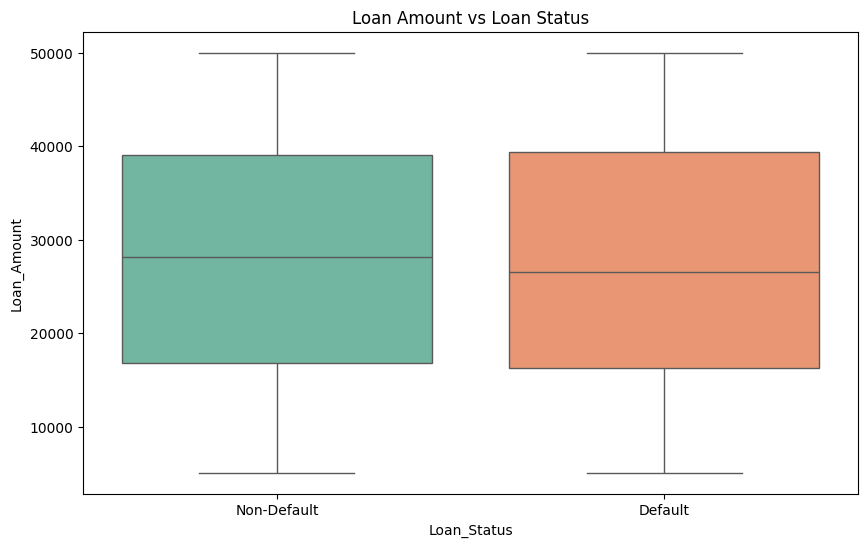

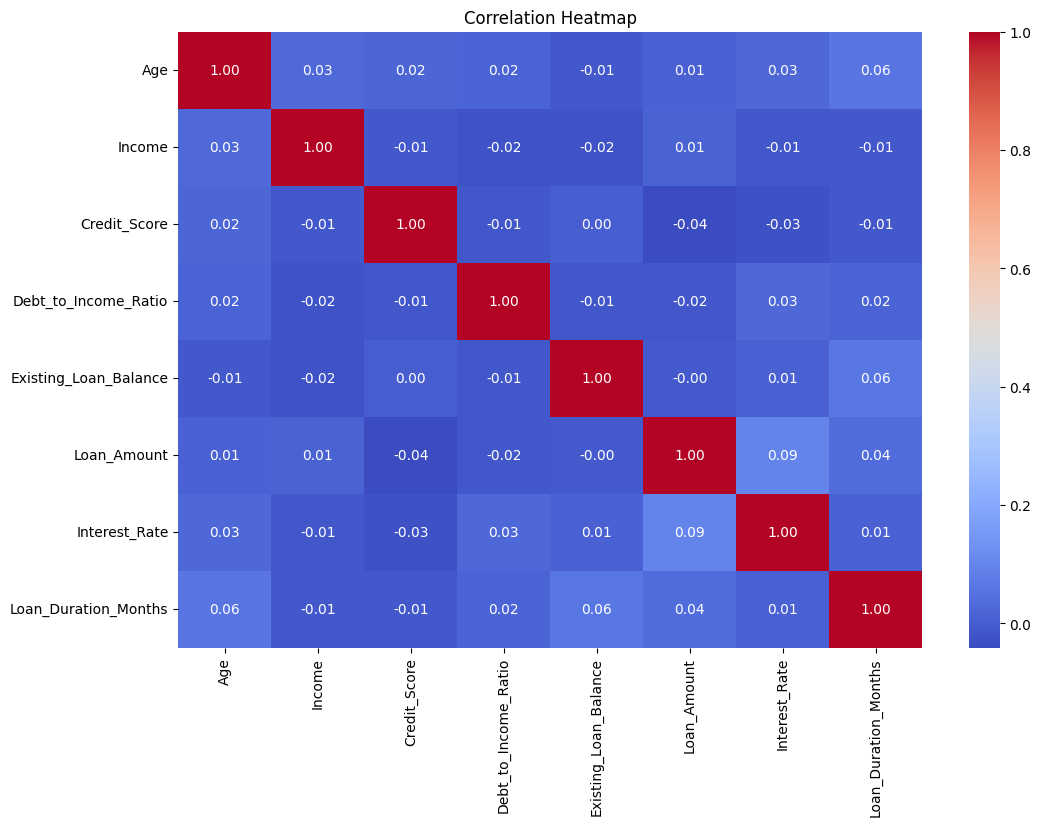

In [ ]:

# Set the aesthetics for the plots
#sns.set(style='whitegrid')

# Plot 1: Distribution of Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Loan_Status', palette='Set2')
plt.title('Distribution of Loan Status')
plt.show()

# Plot 2: Income distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Income', hue='Loan_Status', kde=True, bins=30, palette='Set2',legend=False)
plt.title('Income Distribution by Loan Status')
plt.show()

# Plot 3: Credit Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Credit_Score', hue='Loan_Status', kde=True, bins=30, palette='Set2',legend=False)
plt.title('Credit Score Distribution by Loan Status')
plt.show()

# Plot 4: Employment Status vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Employment_Status', hue='Loan_Status', palette='Set2',legend=False)
plt.title('Employment Status vs Loan Status')
plt.show()

# Plot 5: Debt to Income Ratio vs Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Debt_to_Income_Ratio', hue='Loan_Status', kde=True, bins=30, palette='Set2',legend=False)
plt.title('Debt to Income Ratio by Loan Status')
plt.show()

# Plot 6: Loan Amount vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Loan_Status', y='Loan_Amount', palette='Set2')
plt.title('Loan Amount vs Loan Status')
plt.show()

# Plot 7: Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


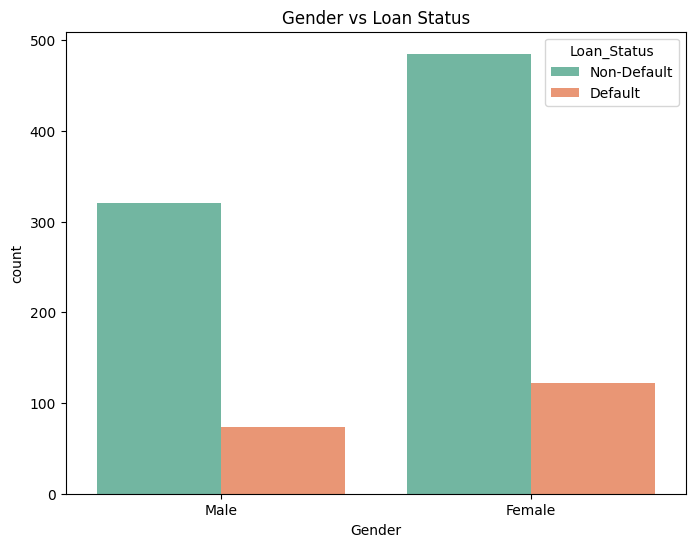

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Loan_Status', palette='Set2')
plt.title('Gender vs Loan Status')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

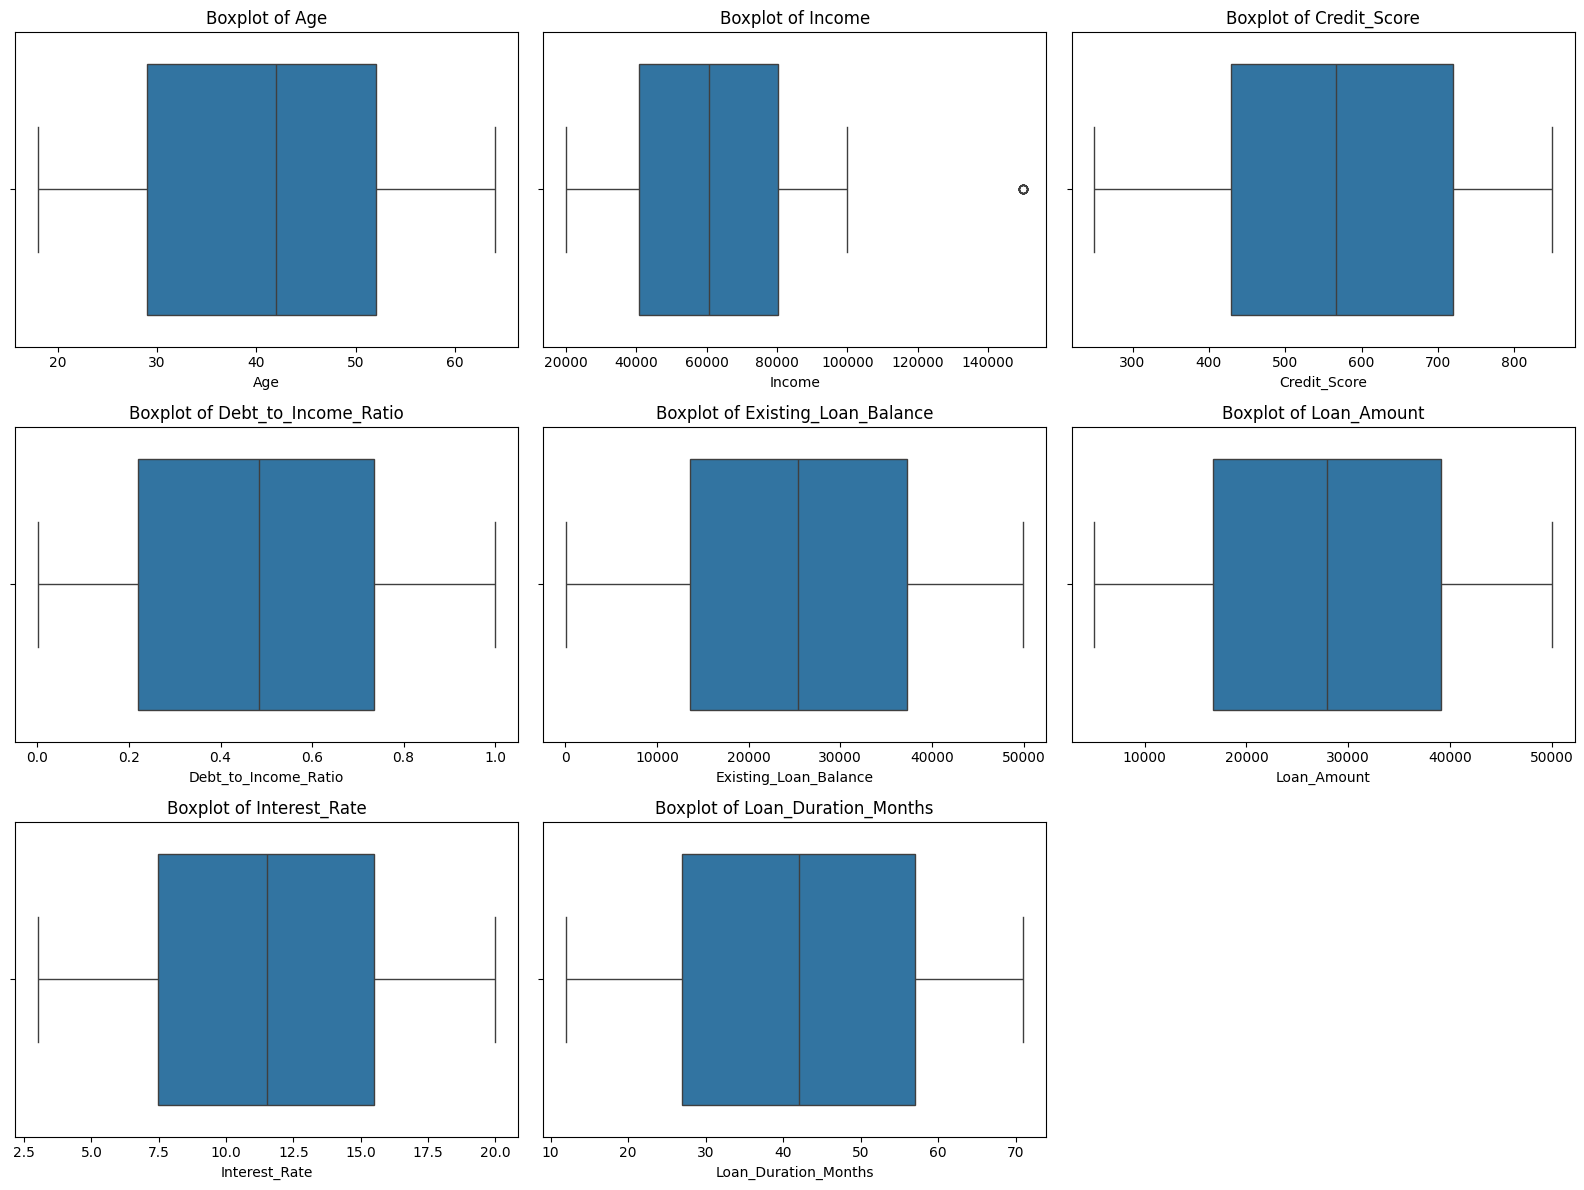

In [ ]:

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# List of numerical columns to analyze
numerical_columns = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio',
                     'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']

# Create a boxplot for each numerical column to detect outliers
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


To see the outliers in income column:

In [208]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Income' column
income_outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]

income_outliers


,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
50,45,Female,150000.0,Employed,Urban,367,0.063901,11874.302118,Non-Default,9994.766626,8.791336,29
51,64,Female,150000.0,Unemployed,Urban,548,0.074335,48945.977806,Non-Default,12970.465592,9.410904,62
52,24,Female,150000.0,Unemployed,Suburban,622,0.115363,19318.406857,Default,24289.917098,18.408655,55
53,61,Female,150000.0,Employed,Rural,817,0.869681,13362.934257,Default,10702.073086,12.011965,42
54,25,Male,150000.0,Employed,Suburban,731,0.472226,21075.559126,Default,30483.326468,5.341970,24
55,64,Male,150000.0,Employed,Rural,786,0.712882,4719.873795,Non-Default,22928.020997,9.273955,37
56,52,Male,150000.0,Unemployed,Rural,728,0.392909,6285.295326,Non-Default,17806.810754,15.275657,55
57,31,Female,150000.0,Employed,Suburban,568,0.258711,20721.702348,Non-Default,12649.541586,5.961131,23
58,34,Male,150000.0,Employed,Rural,836,0.347192,38122.226097,Default,20090.220726,13.033930,29
59,53,Female,150000.0,Employed,Rural,447,0.794182,45015.611979,Non-Default,32358.170787,14.819660,20


Removal of outliers from the Data:

In [209]:

# Filter out outliers
data1= data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

In [210]:
data1

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,Female,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Female,98081.105862,Unemployed,Urban,727,0.961613,3586.586891,Non-Default,41473.241896,3.700707,23
996,40,Male,30044.017181,Employed,Rural,416,0.775082,32993.493341,Default,48942.588814,12.932559,62
997,27,Female,21355.813191,Unemployed,Rural,806,0.621937,21579.216456,Default,34010.252873,3.825633,55
998,61,Female,81612.656941,Employed,Rural,845,0.606793,38180.153354,Default,17504.010506,13.263354,27


In [212]:
data1['Loan_Status'] = data1['Loan_Status'].map({'Non-Default': 0, 'Default': 1})

<ipython-input-212-2815eb8ae440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Loan_Status'] = data1['Loan_Status'].map({'Non-Default': 0, 'Default': 1})


In [213]:
data1.head(5)

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,0,13068.330587,18.185533,59
1,46,Female,37283.054601,Employed,Suburban,474,0.456731,40192.994312,1,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,1,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,0,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,0,41466.397989,18.891582,66


In [ ]:
data1.shape

(990, 12)

In [ ]:
data1.isnull().sum()

,0
Age,0
Gender,0
Income,0
Employment_Status,0
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [214]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Employment_Status','Location']
le=LabelEncoder()
for col in cols:
  data1[col]=le.fit_transform(data1[col])

<ipython-input-214-c2414ca085f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col]=le.fit_transform(data1[col])
<ipython-input-214-c2414ca085f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col]=le.fit_transform(data1[col])
<ipython-input-214-c2414ca085f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [215]:
data1.shape

(990, 12)

In [216]:
# scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
num_cols = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio',
            'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate',
            'Loan_Duration_Months']
data1[num_cols]=minmax.fit_transform(data1[num_cols])

<ipython-input-216-175449156ac0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[num_cols]=minmax.fit_transform(data1[num_cols])


In [ ]:
data1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,0.826087,1,0.641839,0,1,0.649416,0.006520,0.540602,0,0.178234,0.893697,0.796610
1,0.608696,0,0.216290,0,1,0.373957,0.456458,0.803745,1,0.224778,0.513549,0.966102
2,0.304348,1,0.620562,0,2,0.834725,0.328859,0.508224,1,0.023823,0.825705,0.966102
3,0.913043,0,0.651230,0,0,0.308848,0.051895,0.060956,0,0.722766,0.816198,0.237288
4,0.152174,0,0.152162,1,1,0.108514,0.449959,0.383054,0,0.810344,0.935258,0.915254


In [ ]:
data1.to_csv("/content/drive/MyDrive/loan_cleandata.csv", index=False)

In [217]:
# Assuming 'data' is your dataset with a 'target' column for loan default
X = data1.drop('Loan_Status', axis=1)  # Features
y = data1['Loan_Status']  # Target (loan default)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



In [219]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((792, 11), (198, 11), (792,), (198,))

                  Feature  Importance
6    Debt_to_Income_Ratio    0.128288
7   Existing_Loan_Balance    0.128037
8             Loan_Amount    0.125587
2                  Income    0.122612
5            Credit_Score    0.118779
9           Interest_Rate    0.115784
10   Loan_Duration_Months    0.100779
0                     Age    0.095662
4                Location    0.027799
3       Employment_Status    0.021238
1                  Gender    0.015437


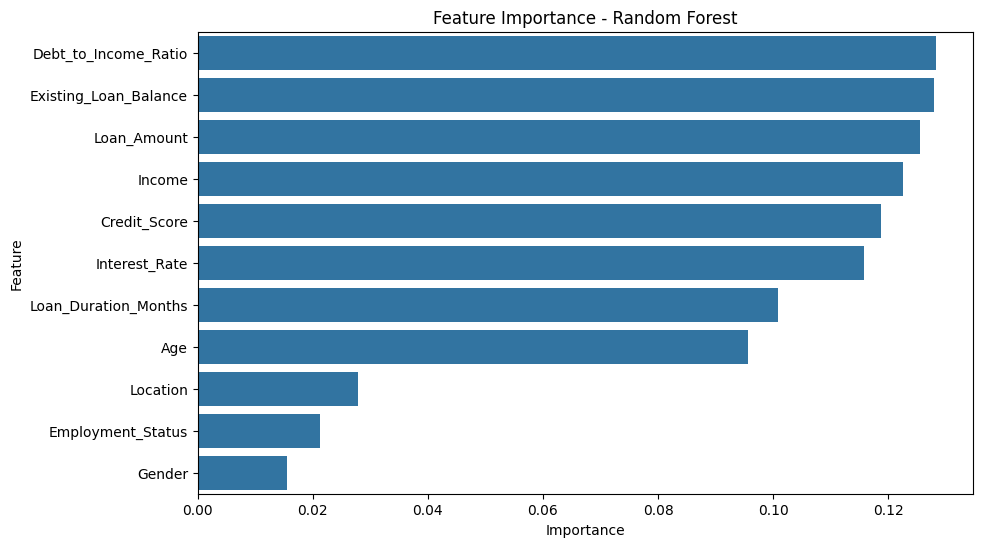

In [218]:


# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance - Random Forest')
plt.show()

DATA BALANCING WITH SMOTE TECHINQUE AND MACHINE LEARNING MODEL EVALUVATION:

In [220]:

#Apply SMOTE to the training data
smote = SMOTE(random_state=15,sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)



In [221]:
y.value_counts()

,count
Loan_Status,
0,799
1,191


In [ ]:
X_sm.shape,y_sm.shape,y_sm.value_counts()

((1598, 11),
 (1598,),
 Loan_Status
 0    799
 1    799
 Name: count, dtype: int64)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

In [223]:
y_train.value_counts(),y_test.value_counts()

(Loan_Status
 0    639
 1    639
 Name: count, dtype: int64,
 Loan_Status
 1    160
 0    160
 Name: count, dtype: int64)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Confusion Matrix:
 [[93 67]
 [69 91]]
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5750
Precision: 0.5759
Recall: 0.5687
F1 Score: 0.5723
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58       160
           1       0.58      0.57      0.57       160

    accuracy                           0.57       320
   macro avg       0.58      0.57      0.57       320
weighted avg       0.58      0.57      0.57       320

ROC AUC score: 0.5889062500000001


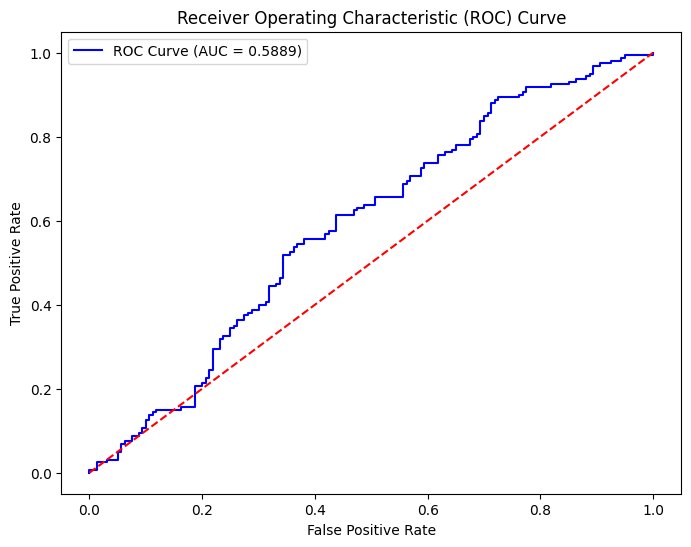

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Step1: Define the logistic regression model
logreg = LogisticRegression(solver='liblinear')
# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' is required for l1 penalty
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Step 3: Perform GridSearch  Search with cross-validation

grid_search.fit(X_train, y_train)

# Step 4: Get the best model and evaluate it on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)

# Step 7: Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f'ROC AUC score:',roc_auc)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Decision Tree Classifier

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Confusion Matrix:
 [[105  55]
 [ 35 125]]
Accuracy: 0.7188
Precision: 0.6944
Recall: 0.7812
F1 Score: 0.7353
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       160
           1       0.69      0.78      0.74       160

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320

ROC AUC score: 0.71875


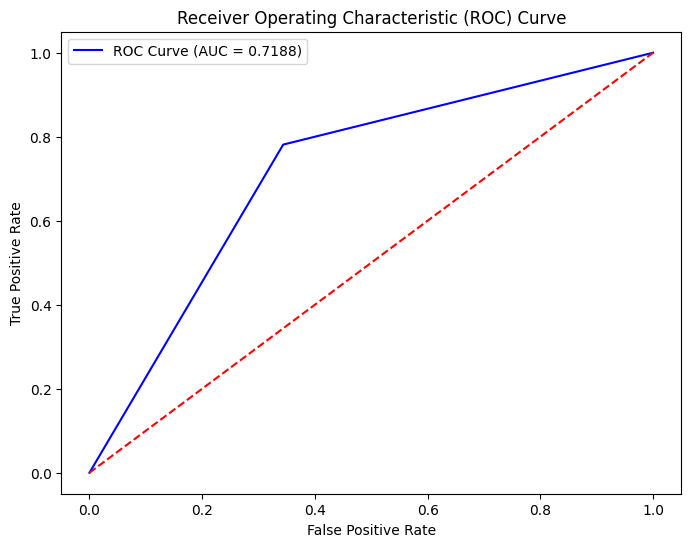

In [224]:

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10, 20, 30, 50]  # Maximum number of leaf nodes
}

# Use RandomizedSearchCV for faster tuning (you can also use GridSearchCV for exhaustive search)
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=100,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
dt_random.fit(X_train, y_train)

# Print the best parameters from tuning
print("Best parameters found: ", dt_random.best_params_)

# Predicting on the test data
y_pred = dt_random.best_estimator_.predict(X_test)
y_prob_dt =dt_random.best_estimator_.predict_proba(X_test)[:, 1]
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)
#ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_dt)
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f'ROC AUC score:',roc_auc)
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Confusion Matrix:
 [[128  32]
 [ 27 133]]
Accuracy: 0.8156
Precision: 0.8061
Recall: 0.8313
F1 Score: 0.8185
ROC AUC: 0.8978
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       160
           1       0.81      0.83      0.82       160

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



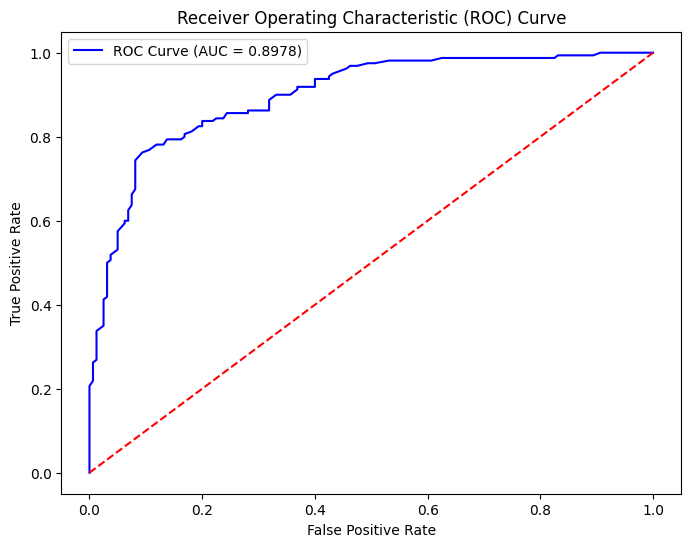

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Remove 'auto', use valid options
    'bootstrap': [True, False]
}


# Using RandomizedSearchCV for faster tuning (you can also use GridSearchCV for exhaustive search)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters from tuning
print("Best parameters found: ", rf_random.best_params_)

# Predicting on the test data
y_pred = rf_random.best_estimator_.predict(X_test)
y_prob_rf =rf_random.best_estimator_.predict_proba(X_test)[:, 1]
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)
# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Confusion Matrix:
 [[124  36]
 [ 29 131]]
Accuracy: 0.7969
Precision: 0.7844
Recall: 0.8187
F1 Score: 0.8012
ROC AUC: 0.8843
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       160
           1       0.78      0.82      0.80       160

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



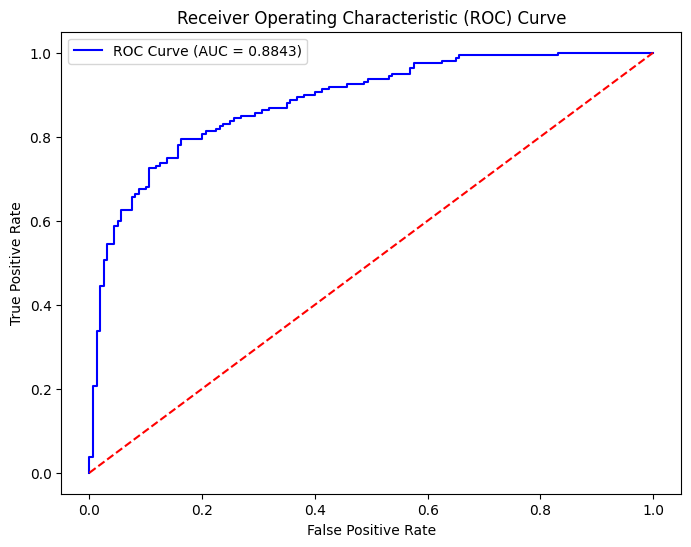

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np


# : Define the XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#  Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],           # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],# Step size shrinkage
    'subsample': [0.8, 1.0],          # Fraction of samples to use
    'colsample_bytree': [0.8, 1.0],   # Fraction of features to use
    'gamma': [0, 0.1, 0.3],           # Minimum loss reduction
    'reg_alpha': [0, 0.1, 1],         # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2]         # L2 regularization term on weights
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it on the test set
best_xgb_model = grid_search.best_estimator_

# Predicting the target for the test set
y_pred = best_xgb_model.predict(X_test)
y_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]

#  Metrics evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Evaluation

print("Best Hyperparameters:", grid_search.best_params_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))



#  Optional - Plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Confusion Matrix:
 [[ 90  70]
 [  5 155]]
Accuracy: 0.7656
Precision: 0.6889
Recall: 0.9688
F1 Score: 0.8052
ROC AUC: 0.7656
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71       160
           1       0.69      0.97      0.81       160

    accuracy                           0.77       320
   macro avg       0.82      0.77      0.76       320
weighted avg       0.82      0.77      0.76       320



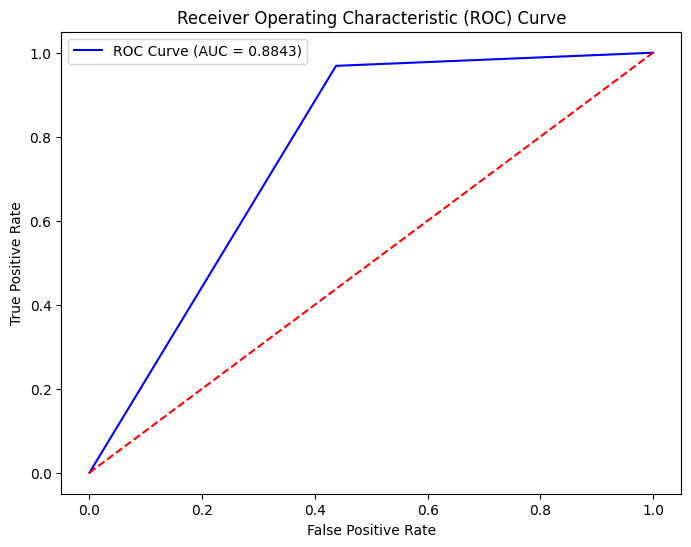

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize KNN
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],            # Try different values of k
    'weights': ['uniform', 'distance'],          # Test uniform and distance-based weighting
    'metric': ['euclidean', 'manhattan']         # Try different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Find the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on the test set
y_pred_k = grid_search.best_estimator_.predict(X_test)
#accuracy
accuracy_knn=accuracy_score(y_test, y_pred_k)
# Precision
precision_knn = precision_score(y_test, y_pred_k)
# Recall
recall_knn = recall_score(y_test, y_pred_k)
# F1 Score
f1_knn = f1_score(y_test, y_pred_k)
# ROC AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_k)
# Evaluation
print("Best Hyperparameters:", grid_search.best_params_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_k))
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'ROC AUC: {roc_auc_knn:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred_k))
#Roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_k)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
joblib.dump(rf_random.best_estimator_ , 'best_random_forest_model.pkl')
print("Model saved as best_random_forest_model.pkl")

Model saved as best_random_forest_model.pkl


Comparison Table:
        Model  Accuracy  F1 Score  Precision  Recall  ROC AUC
     Logistic    0.5750    0.5723     0.5759  0.5680   0.5889
Decision Tree    0.7188    0.7353     0.6944  0.7812   0.7188
Random Forest    0.8156    0.8185     0.8061  0.8313   0.8843
      XGBoost    0.7969    0.8012     0.7844  0.8187   0.8978
          KNN    0.7656    0.8050     0.6869  0.9688   0.7656

Best Model Based on F1 Score:
Model        Random Forest
Accuracy            0.8156
F1 Score            0.8185
Precision           0.8061
Recall              0.8313
ROC AUC             0.8843
Name: 2, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

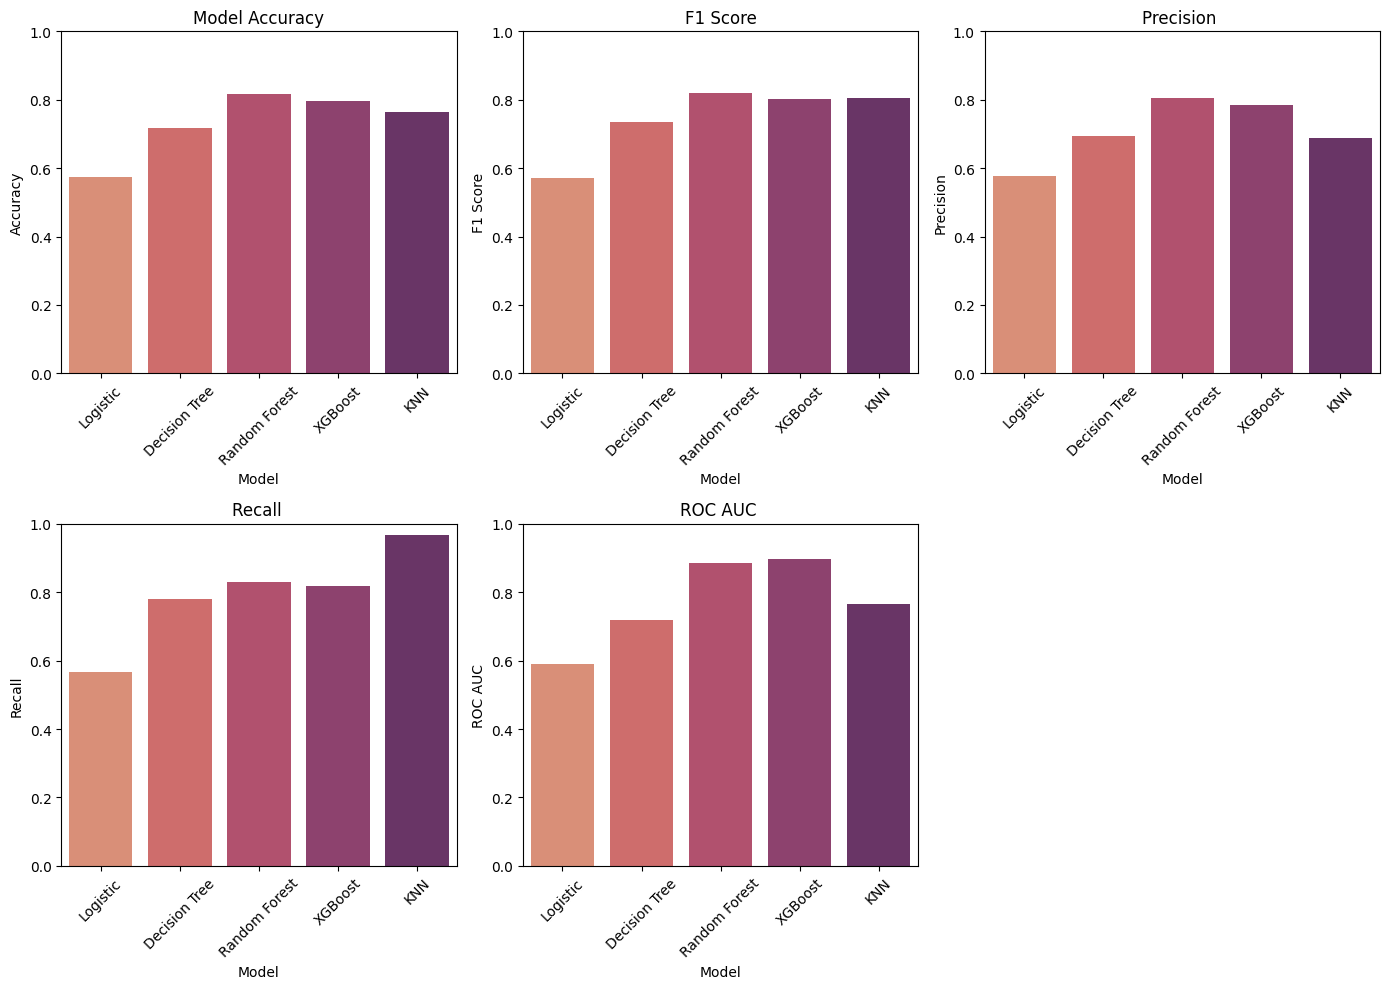

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Data for comparison based on your provided outputs
data = {
    'Model': ['Logistic','Decision Tree','Random Forest', 'XGBoost', 'KNN'],
    'Accuracy': [0.5750,0.7188,0.8156, 0.7969,0.7656,],
    'F1 Score': [0.5723,0.7353,0.8185,0.8012,0.8050],
    'Precision':[0.5759,0.6944,0.8061,0.7844,0.6869],
    'Recall':[0.568,0.7812,0.8313,0.8187,0.9688],
    'ROC AUC':[0.5889,0.7188,0.8843,0.8978,0.7656]


}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on F1 Score:")
print(best_model)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette="flare", hue='Model', dodge=False)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='F1 Score', data=df, palette="flare", hue='Model', dodge=False)
plt.title('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Precision', data=df, palette="flare", hue='Model', dodge=False)
plt.title('Precision ')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Recall (Macro)
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='Recall', data=df, palette="flare", hue='Model', dodge=False)
plt.title('Recall ')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='ROC AUC', data=df, palette="flare", hue='Model', dodge=False)
plt.title('ROC AUC ')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()



FEATURE ENGINEERING:

In [ ]:
newdata=pd.read_csv("/content/drive/MyDrive/loan_cleandata.csv")

In [ ]:
# Implementing the  features

#  Loan-to-Value (LTV) Ratio: Loan_Amount / (Income + Existing_Loan_Balance)
newdata['Loan_to_Value_Ratio'] = newdata['Loan_Amount'] / (newdata['Income'] + newdata['Existing_Loan_Balance'])

#  Debt Burden Ratio: Existing_Loan_Balance / Income
newdata['Debt_Burden_Ratio'] = newdata['Existing_Loan_Balance'] / data1['Income']

# Payment-to-Income Ratio: Monthly payment approximation using simple interest formula
# Assuming Loan_Amount and Loan_Duration_Months are in relevant units
newdata['Monthly_Payment'] = (newdata['Loan_Amount'] * (1 + newdata['Interest_Rate'] / 100)) / data1['Loan_Duration_Months']
newdata['Payment_to_Income_Ratio'] = newdata['Monthly_Payment'] / (newdata['Income'] / 12)

# Showing the new features added
newdata[[ 'Loan_to_Value_Ratio','Debt_Burden_Ratio', 'Payment_to_Income_Ratio']].head()


,Loan_to_Value_Ratio,Debt_Burden_Ratio,Payment_to_Income_Ratio
0,0.150734,0.842272,4.220512
1,0.220363,3.716053,12.974786
2,0.021105,0.818973,0.480783
3,1.014856,0.093601,56.584670
4,1.514050,2.517410,70.476681


In [ ]:
data1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months,Loan_to_Value_Ratio,Debt_Burden_Ratio,Monthly_Payment,Payment_to_Income_Ratio
0,0.826087,1,0.641839,0,1,0.649416,0.006520,0.540602,0,0.178234,0.893697,0.796610,0.150734,0.842272,0.225741,4.220512
1,0.608696,0,0.216290,0,1,0.373957,0.456458,0.803745,1,0.224778,0.513549,0.966102,0.220363,3.716053,0.233860,12.974786
2,0.304348,1,0.620562,0,2,0.834725,0.328859,0.508224,1,0.023823,0.825705,0.966102,0.021105,0.818973,0.024863,0.480783
3,0.913043,0,0.651230,0,0,0.308848,0.051895,0.060956,0,0.722766,0.816198,0.237288,1.014856,0.093601,3.070804,56.584670
4,0.152174,0,0.152162,1,1,0.108514,0.449959,0.383054,0,0.810344,0.935258,0.915254,1.514050,2.517410,0.893657,70.476681


In [ ]:

# Replace infinite values with NaN
newdata.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with 0 (or another appropriate value)
newdata.fillna(0, inplace=True)

minmax=MinMaxScaler()
cols=['Loan_to_Value_Ratio','Debt_Burden_Ratio', 'Payment_to_Income_Ratio']
newdata[cols]=minmax.fit_transform(newdata[cols])

In [ ]:
newdata.shape

(990, 16)

In [ ]:
newdata.isnull().sum()

,0
Age,0
Gender,0
Income,0
Employment_Status,0
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [ ]:
X = newdata.drop('Loan_Status', axis=1)  # Features
y = newdata['Loan_Status']  # Target (loan default)

In [ ]:
#Apply SMOTE to the training data
smote = SMOTE(random_state=15,sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

In [ ]:
X_train.value_counts()
y_train.value_counts()


,count
Loan_Status,
0,639
1,639


In [ ]:
X_train.shape ,y_train.shape

((1278, 15), (1278,))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Confusion Matrix:
 [[140  20]
 [ 27 133]]
Accuracy: 0.8531
Precision: 0.8693
Recall: 0.8313
F1 Score: 0.8498
ROC AUC: 0.9162
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       160
           1       0.87      0.83      0.85       160

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



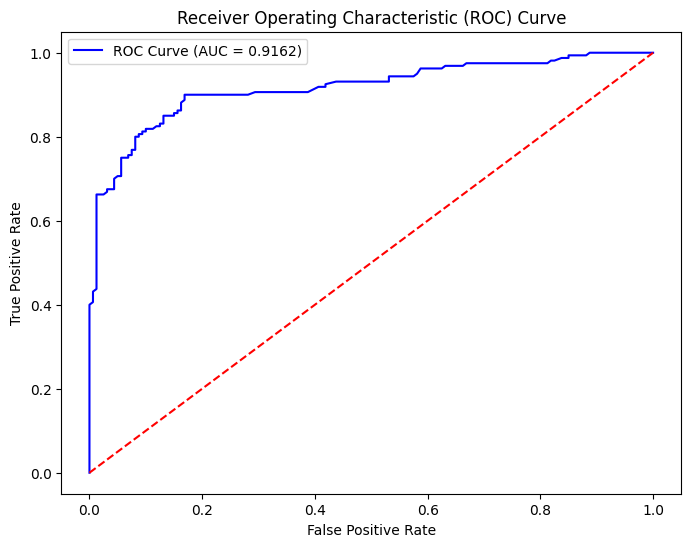

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Remove 'auto', use valid options
    'bootstrap': [True, False]
}


# Using RandomizedSearchCV for faster tuning (you can also use GridSearchCV for exhaustive search)
rf1_random = RandomizedSearchCV(estimator=rf1, param_distributions=param_grid, n_iter=100,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf1_random.fit(X_train, y_train)

# Print the best parameters from tuning
print("Best parameters found: ", rf1_random.best_params_)

# Predicting on the test data
y_pred = rf1_random.best_estimator_.predict(X_test)
y_prob_rf =rf1_random.best_estimator_.predict_proba(X_test)[:, 1]
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)
# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



In [ ]:
joblib.dump(rf1_random.best_estimator_, 'final_random_forest_model.pkl')
print("Model saved as 'final_random_forest_model.pkl")

Model saved as 'final_random_forest_model.pkl


In [ ]:
model=joblib.load('best_random_forest_model.pkl')

In [ ]:
import pandas as pd

df=pd.DataFrame({
    'Age':31,
    'Gender':0  ,
    'Income':70000,
    'Employment_Status':0,
    'Location':2,
    'Credit_Score':650,
    'Debt_to_Income_Ratio':0.34,
    'Existing_Loan_Balance':15735,
    'Loan_Amount':100000,
    'Interest_Rate':18,
    'Loan_Duration_Months':24
},index=[0])

In [ ]:
df

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,31,0,70000,0,2,650,0.34,15735,100000,18,24


In [ ]:
result=model.predict(df)


In [ ]:
if result==1:
  print("person will default")
else:
  print("person will not default")

person will not default
